## List TEN things you learned during Week 6 and FIVE things you still don't understand or are curious and would like to learn about.

- ### *Things I have learned* 

1. using the SVD to explore the action of a matrix on the standard unit vectors in 2D space
2. The transpose of a rotation matrix is a rotation in the opposite direction. 
3. A rotation matrix clockwise by an angle $\theta$ is: 
$$\begin{pmatrix}\cos\theta&\sin\theta\\-\sin\theta &\cos\theta\end{pmatrix}$$
4. The determinant of a rotation matrix is $1$ and the determinant of the reflection matrix is $-1$.
5. both rotations and reflections have orthonormal rows and columns. Also, their inverse is their transpose. 
6. Three different ways of multiplying two matrices.
7. How to calculate the slopes of the reflection lines
8. How circle gets transformed into an ellipse using python
9. understanding the ingredients of the singular value decomposition
10. understanding the matrices $U$ and $V$ in the singular value decomposition as reflections or rotations


- ### *Things that I am still struggling with*
1. Are we going to use the same methodology to visualize more than two dimensial matrices?
2. In order to get the SVD of a matrix, does it have to be invertible?
3. In creating the subplots, i do not know how to change the scale ofmy axes?
4. What is the rank of a matrix? 
5. Is there any way that we can make 3D graphs using SVD?

# Reflection Matrix About A Straight Line

A reflection matrix about a line $L$ making an angle $\theta$ with the $x$-axis is:
$$\begin{pmatrix}\cos2\theta&\sin2\theta\\\sin2\theta &-\cos2\theta\end{pmatrix}$$

In class, we computed the singular value decomposition of the matrix 
$$A=\begin{pmatrix}1&5\\-1&2\end{pmatrix}$$
$$A=U\Sigma V^t=\begin{pmatrix} 0.93788501 &0.34694625\\0.34694625&-0.93788501\end{pmatrix}\begin{pmatrix}5.41565478&0\\0&1.29254915\end{pmatrix}\begin{pmatrix}0.10911677&0.99402894\\0.99402894&-0.10911677\end{pmatrix}$$
We noted that the resulting matrices $U$ and $V$ are reflection matrices (not rotation matrices).
1. Find the angle of the straight lines $L_U$ and $L_{V^t}$ that acts as a mirror for this reflection.
2. Find the equations of the lines of reflection.
3. Use python to plot these lines.
4. On the same plot, plot a general vector $x$, $V^tx$, $\Sigma V^t x$, and $U\Sigma V^t x=Ax$ 

YOUR ANSWER HERE

U=
 [[ 0.93788501  0.34694625]
 [ 0.34694625 -0.93788501]]
sigma=
 [5.41565478 1.29254915]
Sigma=
 [[5.41565478 0.        ]
 [0.         1.29254915]]
Vt=
 [[ 0.10911677  0.99402894]
 [ 0.99402894 -0.10911677]]
Equation of line along which Vt reflects is:
 y=0.8962347008436107x
Equation of line along which U reflects is:
 y=0.17903345403184898x


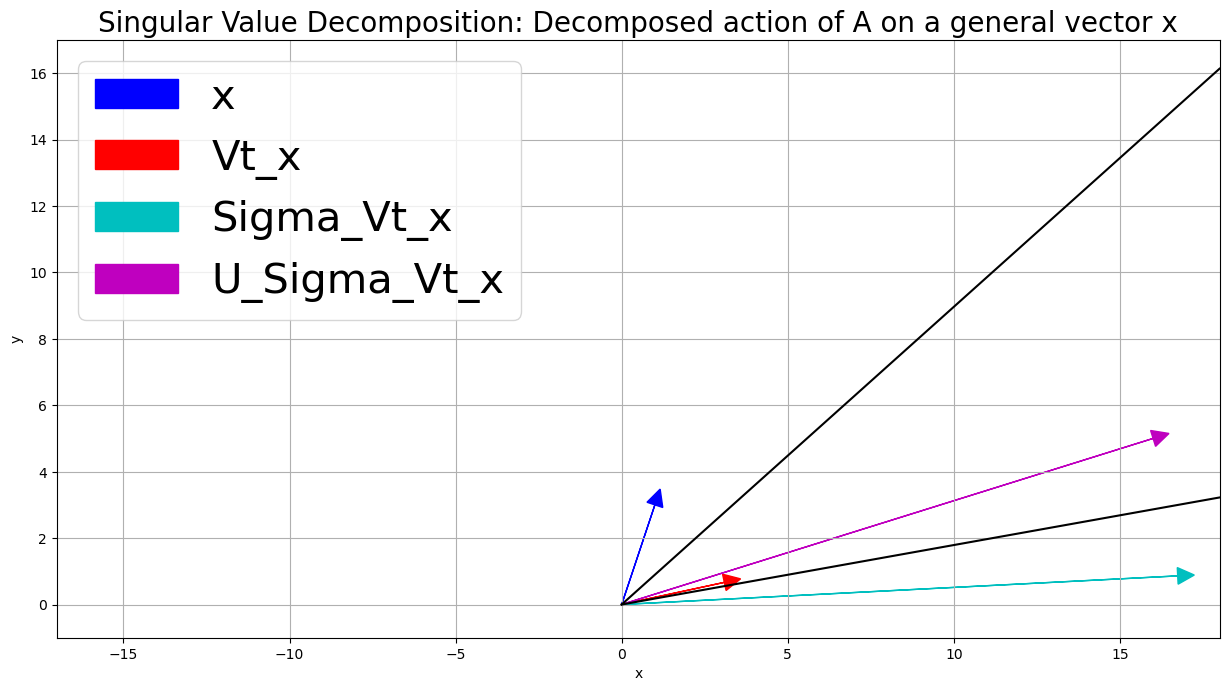

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# define A as a numpy array
A=np.array([[1,5],[-1,2]])


# perform SVD on A
U,sigma,Vt=np.linalg.svd(A)
print("U=\n",U)
print("sigma=\n",sigma)
# store sigma in a diagonal matrix that has the same shape as A
Sigma=np.diag(sigma)
print("Sigma=\n",Sigma)
print("Vt=\n",Vt)

# choose a vector x
x=[1,3]

# apply V^t then Sigma then U to x
Vt_x=(Vt).dot(x)
Sigma_Vt_x=Sigma.dot(Vt_x)
U_Sigma_Vt_x=U.dot(Sigma_Vt_x)

#2. Calculate the slopes of the reflection lines: slope= tan(theta)=tan(0.5*cos^-1(R(0,0))) 
# where R is the reflection matrix
slope_L_Vt=np.tan(0.5*np.arccos(Vt[0,0]))
print(f'Equation of line along which Vt reflects is:\n y={slope_L_Vt}x')
slope_L_U=np.tan(0.5*np.arccos(U[0,0]))
print(f'Equation of line along which U reflects is:\n y={slope_L_U}x')

# The equation of the line is y=tan(theta)x. Discretize in order to plot the straightlines.
x_discrete = np.linspace(0,18,100)
y_L_Vt = slope_L_Vt*x_discrete
y_L_U = slope_L_U*x_discrete

# Plot the vectors using arrow in matplolib.pyplot.axes
# set the figure and labels
plt.figure(figsize=(15,15))
vec= plt.axes()
plt.axis('scaled') # the scale on the x-axis is the same as the y-axis
plt.xlim(-17,18)
plt.ylim(-1,17)
plt.title('Singular Value Decomposition: Decomposed action of A on a general vector x',fontsize=20)
plt.xlabel('x')
plt.ylabel('y')

#3. plot the straight lines
plt.plot(x_discrete, y_L_Vt, 'k')
plt.plot(x_discrete, y_L_U, 'k')

# show the grid
plt.grid()

#4. plot the vectors as arrows
arrow_x=vec.arrow(0, 0, *x, head_width=0.5, head_length=0.5, color='b', label='x')
arrow_Vt_x=vec.arrow(0, 0, *Vt_x, head_width=0.5, head_length=0.5, color='r',label='Vt_x')
arrow_Sigma_Vt_x=vec.arrow(0, 0, *Sigma_Vt_x, head_width=0.5, head_length=0.5, color='c',label='Sigma_Vt_x')
arrow_U_Sigma_Vt_x=vec.arrow(0, 0, *U_Sigma_Vt_x, head_width=0.5, head_length=0.5, color='m',label='U_Sigma_Vt_x')

# set the legend
plt.legend([arrow_x,arrow_Vt_x,arrow_Sigma_Vt_x, arrow_U_Sigma_Vt_x], 
           ['x','Vt_x','Sigma_Vt_x','U_Sigma_Vt_x'],loc=2, prop={'size': 30})

# Explain how some matrices *almost collapse* space (Hint: singular values, singular vectors, ill conditioning). 

Step 1: Using the effective matrix factorization technique known as singular value decomposition (SVD), a given matrix is represented as the union of three other matrices. The SVD specifically factors a m x n matrix A as follows: A=UΣV_t where U is an m x m orthogonal matrix, V is an n x n orthogonal matrix, and Σ is an m x n diagonal matrix with non-negative real numbers on the diagonal called singular values.

Step 2: The singular values are arranged in descending order and capture crucial facets of the matrix, such as its rank. The significance of the corresponding singular vectors (the columns of U and V) in representing the matrix increases with the size of the singular values.

Step 3: Now, if a matrix has small singular values, this indicates that the data is noisy or redundant. On the other hand, a matrix is almost rank-deficient or ill-conditioned if it only has a few large singular values and the rest are close to zero. To put it another way, the matrix can be almost completely compressed into a lower-dimensional subspace that is spanned by the singular vectors that correspond to the large singular values.

Step 4: Take a large image matrix as an illustration, where each row corresponds to a pixel and each column to a color channel. The image can be represented by a low-rank matrix with a few large singular values if it is grayscale. An even lower-rank matrix with lots of tiny singular values can represent an image that is primarily black or white. In both situations, the image is almost completely compressed into a lower-dimensional subspace that is bounded by the singular vectors that correspond to the significant singular values. Data and image compression both frequently employ this concept.

# Action of a matrix on space

Consider the matrix
$$A=\begin{pmatrix}3&0\\4&5\end{pmatrix}$$

Write a program that does the following:

1. Find the singular value decompositin of $A=U\Sigma V^t$.
2. Make four subplots showing the action of $A=U\Sigma V^t$ on the right singular vectors $v_1$ and $v_2$, as well as the unit circle centered at the origin. 

U=
 [[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]]
sigma=
 [6.70820393 2.23606798]
Sigma=
 [[6.70820393 0.        ]
 [0.         2.23606798]]
Vt=
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
U.Sigma.Vt=
 [[3.00000000e+00 9.53863757e-16]
 [4.00000000e+00 5.00000000e+00]]
A=
 [[3 0]
 [4 5]]


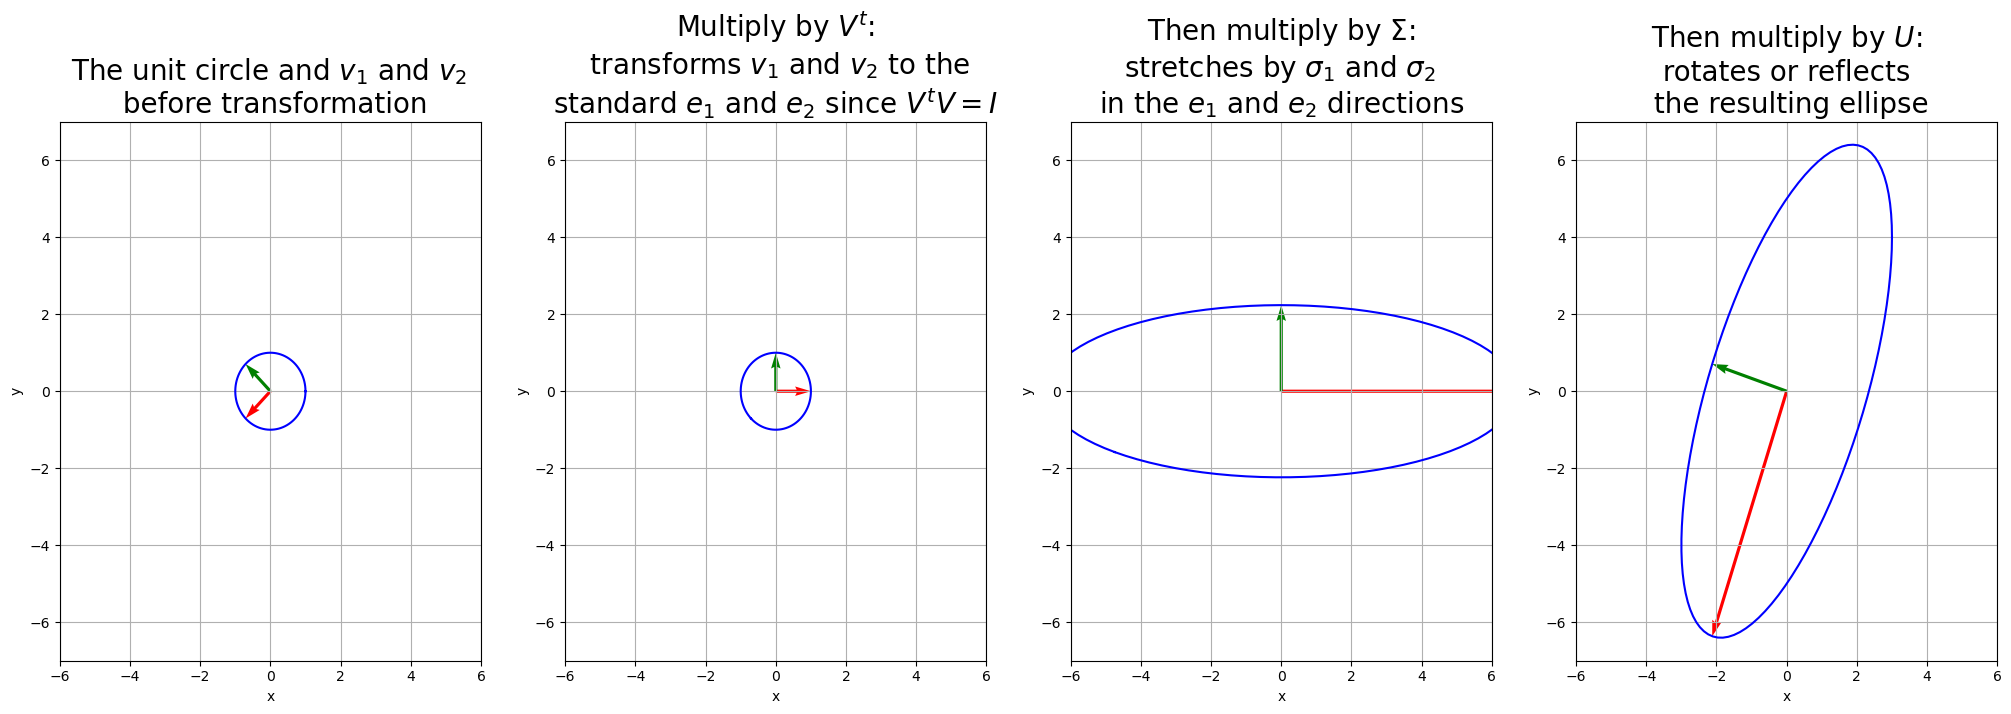

In [4]:
# YOUR CODE HERE
# define A as a numpy array
A=np.array([[3,0],[4,5]])

#1. perform SVD on A
U,sigma,Vt=np.linalg.svd(A)
print("U=\n",U)
print("sigma=\n",sigma)
# store sigma in a diagonal matrix that has the same shape as A
Sigma=np.diag(sigma)
print("Sigma=\n",Sigma)
print("Vt=\n",Vt)

# Check whether you can recover A
print('U.Sigma.Vt=\n',U.dot(Sigma.dot(Vt)))
print('A=\n',A)
#2. These are the columns of U
u_1=U[:,0]
u_2=U[:,1]

# These are the columns of V (not Vt, I transpose Vt first)
V=Vt.T
v_1=V[:,0]
v_2=V[:,1]

# set the figure and labels
fig, subs=plt.subplots(nrows=1, ncols=4, figsize=(25,7))
subs[0].grid()
subs[0].set_xlabel('x')
subs[0].set_ylabel('y')
subs[0].set_xlim(-6,6)
subs[0].set_ylim(-7,7)
subs[0].set_title('The unit circle and $v_1$ and $v_2$ \n before transformation', fontsize=20)

subs[1].grid()
subs[1].set_xlabel('x')
subs[1].set_ylabel('y')
subs[1].set_xlim(-6,6)
subs[1].set_ylim(-7,7)
subs[1].set_title('''Multiply by $V^t$:\n transforms $v_1$ and $v_2$ to the
standard $e_1$ and $e_2$ since $V^tV=I$''', fontsize=20)

subs[2].grid()
subs[2].set_xlabel('x')
subs[2].set_ylabel('y')
subs[2].set_xlim(-6,6)
subs[2].set_ylim(-7,7)
subs[2].set_title('''Then multiply by $\Sigma$:
stretches by $\sigma_1$ and $\sigma_2$ 
in the $e_1$ and $e_2$ directions''', fontsize=20)

subs[3].grid()
subs[3].set_xlabel('x')
subs[3].set_ylabel('y')
subs[3].set_xlim(-6,6)
subs[3].set_ylim(-7,7)
subs[3].set_title('Then multiply by $U$:\n rotates or reflects \n the resulting ellipse', fontsize=20)


# plot v_1 and v_2 in the first subplot: I will use the quiver function instead of the arrow function
# The parameters passed to quiver are chosen so as the vector arrows have length= Euclidean length
subs[0].quiver(0,0,v_1[0],v_1[1],scale=1,scale_units='xy',angles='xy',color=['r'])  
subs[0].quiver(0,0,v_2[0],v_2[1],scale=1, scale_units='xy',angles='xy', color=['g']) 
# plot the unit circle in the first subplot
t=np.linspace(0,2*np.pi,100)
x=np.cos(t)
y=np.sin(t)
subs[0].plot(x,y,'b')

# Calculate then plot V^t*v1 and V^t*v2 in the second subplot
Vt_v1=Vt.dot(v_1)
Vt_v2=Vt.dot(v_2)
subs[1].quiver(0,0,Vt_v1[0],Vt_v1[1],scale=1,scale_units='xy',angles='xy',color=['r']) 
subs[1].quiver(0,0,Vt_v2[0],Vt_v2[1],scale=1,scale_units='xy',angles='xy',color=['g']) 
# Plot V^t*circle_points on the second plot
Vt_x=Vt[0,0]*x+Vt[0,1]*y
Vt_y=Vt[1,0]*x+Vt[1,1]*y
subs[1].plot(Vt_x,Vt_y,'b')

# Calculate then plot Sigma*V^t*v1 and Sigma*V^t*v2 in the third subplot
Sigma_Vt_v1=Sigma.dot(Vt.dot(v_1))
Sigma_Vt_v2=Sigma.dot(Vt.dot(v_2))
subs[2].quiver(0,0,Sigma_Vt_v1[0],Sigma_Vt_v1[1],scale=1,scale_units='xy',angles='xy',color=['r']) 
subs[2].quiver(0,0,Sigma_Vt_v2[0],Sigma_Vt_v2[1],scale=1,scale_units='xy',angles='xy',color=['g']) 
# Plot Sigma*V^t*circle_points on the third plot
Sigma_Vt=Sigma.dot(Vt)
Sigma_Vt_x=Sigma_Vt[0,0]*x+Sigma_Vt[0,1]*y
Sigma_Vt_y=Sigma_Vt[1,0]*x+Sigma_Vt[1,1]*y
subs[2].plot(Sigma_Vt_x,Sigma_Vt_y,'b')

# Calculate then plot U*Sigma*V^t*v1 and U*Sigma*V^t*v1 in the fourth subplot
U_Sigma_Vt_v1=U.dot(Sigma.dot(Vt.dot(v_1)))
U_Sigma_Vt_v2=U.dot(Sigma.dot(Vt.dot(v_2)))
subs[3].quiver(0,0,U_Sigma_Vt_v1[0],U_Sigma_Vt_v1[1],scale=1,scale_units='xy',angles='xy',color=['r']) 
subs[3].quiver(0,0,U_Sigma_Vt_v2[0],U_Sigma_Vt_v2[1],scale=1,scale_units='xy',angles='xy',color=['g']) 
# Plot U*Sigma*V^t*circle_points on the third plot
U_Sigma_Vt=U.dot(Sigma.dot(Vt))
U_Sigma_Vt_x=U_Sigma_Vt[0,0]*x+U_Sigma_Vt[0,1]*y
U_Sigma_Vt_y=U_Sigma_Vt[1,0]*x+U_Sigma_Vt[1,1]*y
subs[3].plot(U_Sigma_Vt_x,U_Sigma_Vt_y,'b')

plt.savefig('Fig_svd_steps.png',bbox_inches='tight', pad_inches=1)